In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

In [2]:
working_directory = os.getcwd()
print(working_directory)

C:\Users\psrin\OneDrive - The University of Texas at Dallas\Desktop\Srini UTD\BUAN 6341


In [3]:
data = pd.read_csv(r'C:\Users\psrin\OneDrive - The University of Texas at Dallas\Desktop\Srini UTD\BUAN 6341\Assignment\SeoulBikeData.csv',encoding = 'unicode_escape',index_col=0)

In [3]:
data = pd.read_csv(r'/Users/srini/OneDrive - The University of Texas at Dallas/Desktop/Srini UTD/BUAN 6341/Assignment/SeoulBikeData.csv',encoding = 'unicode_escape',index_col=0)

In [4]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.columns = ['rented_bike_count', 'hour','temperature_in_c','humidity_percentage','wind_speed_mps','visibility_10m','dew_point_temperature_in_c','solar_radiation','rainfall_mm','snowfall_cm','seasons','holiday','functioning_day']

In [6]:
data.loc[data["rented_bike_count"] < 704.602, "rented_bike_count"] = 0
data.loc[data["rented_bike_count"] >= 704.602, "rented_bike_count"] = 1
data.loc[data["seasons"] == "Spring", "seasons"] = 1
data.loc[data["seasons"] == "Summer", "seasons"] = 2
data.loc[data["seasons"] == "Autumn", "seasons"] = 3
data.loc[data["seasons"] == "Winter", "seasons"] = 4
data.loc[data["functioning_day"] == "Yes", "functioning_day"] = 1
data.loc[data["functioning_day"] == "No", "functioning_day"] = 0
data.loc[data["holiday"] == "Holiday", "holiday"] = 1
data.loc[data["holiday"] == "No Holiday", "holiday"] = 0

In [7]:
data['rented_bike_count'].value_counts()

0    5238
1    3522
Name: rented_bike_count, dtype: int64

In [7]:
data = data.reset_index(drop=True)
data.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12]
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1


In [8]:
x = data[[1,2,3,4,5,6,7,8,9,10,11,12]].values
y = data[[0]].values
x_train, x_test = x[:6132,:], x[6132:,:]
print(x_train.shape, x_test.shape)
y_train, y_test = y[:6132,:], y[6132:,:]
print(y_train.shape, y_test.shape)

(6132, 12) (2628, 12)
(6132, 1) (2628, 1)


In [9]:
u = np.unique(y, return_inverse = True)
u

(array([0, 1]), array([0, 0, 0, ..., 0, 1, 0]))

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Fixing number of nodes and layers, varying activation function

#### Early stopping of epochs

In [11]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20, 
    restore_best_weights=True,
)

#### 5 layers and 64 nodes initially

In [ ]:
for activation in ['softmax']:
    # Initialising the NN
    model = Sequential()

    model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = activation, input_dim = 12))
    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.25))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.5))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    opt = Adam(learning_rate=0.00009)
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, batch_size = 32, epochs = 200, callbacks=[early_stopping], validation_split=0.2)

    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('Model accuracy score with 8 layers, 128 nodes initially with activation function {0} : {1}'.format(activation,accuracy_score(y_test, y_pred)))
    

Epoch 1/200
154/154 [==============================] - 2s 5ms/step - loss: 0.6897 - accuracy: 0.6573 - val_loss: 0.6956 - val_accuracy: 0.4156
Epoch 2/200
154/154 [==============================] - 1s 7ms/step - loss: 0.6844 - accuracy: 0.7138 - val_loss: 0.6980 - val_accuracy: 0.4156
Epoch 3/200
154/154 [==============================] - 1s 7ms/step - loss: 0.6797 - accuracy: 0.7158 - val_loss: 0.7005 - val_accuracy: 0.4156
Epoch 4/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6748 - accuracy: 0.7158 - val_loss: 0.7031 - val_accuracy: 0.4156
Epoch 5/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6701 - accuracy: 0.7158 - val_loss: 0.7058 - val_accuracy: 0.4156
Epoch 6/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6658 - accuracy: 0.7158 - val_loss: 0.7086 - val_accuracy: 0.4156
Epoch 7/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6616 - accuracy: 0.7158 - val_loss: 0.7114 - val_accuracy: 0.4156

In [50]:
for activation in ['relu','tanh','selu','softmax']:
    # Initialising the NN
    model = Sequential()

    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation, input_dim = 12))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.25))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.5))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    opt = Adam(learning_rate=0.00009)
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, batch_size = 32, epochs = 200, callbacks=[early_stopping], validation_split=0.2)

    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('Model accuracy score with 5 layers, 64 nodes initially with activation function {0} : {1}'.format(activation,accuracy_score(y_test, y_pred)))
    

Epoch 1/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6913 - accuracy: 0.7154 - val_loss: 0.6945 - val_accuracy: 0.4156
Epoch 2/200
154/154 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.7158 - val_loss: 0.6922 - val_accuracy: 0.4156
Epoch 3/200
154/154 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.7158 - val_loss: 0.6734 - val_accuracy: 0.4156
Epoch 4/200
154/154 [==============================] - 0s 3ms/step - loss: 0.4258 - accuracy: 0.7158 - val_loss: 0.6578 - val_accuracy: 0.4156
Epoch 5/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.7329 - val_loss: 0.6516 - val_accuracy: 0.4156
Epoch 6/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8090 - val_loss: 0.6443 - val_accuracy: 0.7449
Epoch 7/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.8683 - val_loss: 0.6342 - val_accuracy: 0.7351

Epoch 2/200
154/154 [==============================] - 1s 3ms/step - loss: 0.5848 - accuracy: 0.8869 - val_loss: 0.6062 - val_accuracy: 0.7180
Epoch 3/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.9054 - val_loss: 0.5959 - val_accuracy: 0.6846
Epoch 4/200
154/154 [==============================] - 1s 3ms/step - loss: 0.2941 - accuracy: 0.9078 - val_loss: 0.6343 - val_accuracy: 0.6764
Epoch 5/200
154/154 [==============================] - 1s 3ms/step - loss: 0.2693 - accuracy: 0.9103 - val_loss: 0.6826 - val_accuracy: 0.6707
Epoch 6/200
154/154 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.9115 - val_loss: 0.7214 - val_accuracy: 0.6626
Epoch 7/200
154/154 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9125 - val_loss: 0.7489 - val_accuracy: 0.6585
Epoch 8/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.9121 - val_loss: 0.7748 - val_accuracy: 0.6553

#### 8 layers and 64 nodes initially

In [51]:
for activation in ['relu','tanh','selu','softmax']:
    # Initialising the NN
    model = Sequential()

    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation, input_dim = 12))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.25))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.5))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    opt = Adam(learning_rate=0.00009)
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, batch_size = 32, epochs = 200, callbacks=[early_stopping], validation_split=0.2)

    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('Model accuracy score with 8 layers, 64 nodes initially with activation function {0} : {1}'.format(activation,accuracy_score(y_test, y_pred)))
    

Epoch 1/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.7158 - val_loss: 0.6943 - val_accuracy: 0.4156
Epoch 2/200
154/154 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.7158 - val_loss: 0.6957 - val_accuracy: 0.4156
Epoch 3/200
154/154 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.7158 - val_loss: 0.6978 - val_accuracy: 0.4156
Epoch 4/200
154/154 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.7158 - val_loss: 0.6973 - val_accuracy: 0.4156
Epoch 5/200
154/154 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.7158 - val_loss: 0.6699 - val_accuracy: 0.4156
Epoch 6/200
154/154 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.7158 - val_loss: 0.6640 - val_accuracy: 0.4156
Epoch 7/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.7158 - val_loss: 0.6624 - val_accuracy: 0.4156

Epoch 16/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.9180 - val_loss: 0.6525 - val_accuracy: 0.6911
Epoch 17/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3092 - accuracy: 0.9178 - val_loss: 0.6528 - val_accuracy: 0.6911
Epoch 18/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3072 - accuracy: 0.9174 - val_loss: 0.6637 - val_accuracy: 0.6838
Epoch 19/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.9176 - val_loss: 0.6663 - val_accuracy: 0.6846
Epoch 20/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.9166 - val_loss: 0.6709 - val_accuracy: 0.6773
Epoch 21/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.9158 - val_loss: 0.6791 - val_accuracy: 0.6732
Epoch 22/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2862 - accuracy: 0.9166 - val_loss: 0.6973 - val_accuracy:

Epoch 20/200
154/154 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.7158 - val_loss: 0.7511 - val_accuracy: 0.4156
Epoch 21/200
83/83 [==============================] - 0s 1ms/step
Model accuracy score with 8 layers, 64 nodes initially with activation function softmax : 0.463089802130898


#### 8 layers and 128 nodes initially

In [52]:
for activation in ['relu','tanh','selu','softmax']:
    # Initialising the NN
    model = Sequential()

    model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = activation, input_dim = 12))
    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.25))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.5))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    opt = Adam(learning_rate=0.00009)
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, batch_size = 32, epochs = 200, callbacks=[early_stopping], validation_split=0.2)

    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('Model accuracy score with 8 layers, 128 nodes initially with activation function {0} : {1}'.format(activation,accuracy_score(y_test, y_pred)))
    

Epoch 1/200
154/154 [==============================] - 2s 4ms/step - loss: 0.6916 - accuracy: 0.7156 - val_loss: 0.6944 - val_accuracy: 0.4156
Epoch 2/200
154/154 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.7158 - val_loss: 0.6961 - val_accuracy: 0.4156
Epoch 3/200
154/154 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.7158 - val_loss: 0.6782 - val_accuracy: 0.4156
Epoch 4/200
154/154 [==============================] - 0s 3ms/step - loss: 0.4044 - accuracy: 0.7158 - val_loss: 0.6570 - val_accuracy: 0.4156
Epoch 5/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3919 - accuracy: 0.7158 - val_loss: 0.6550 - val_accuracy: 0.4156
Epoch 6/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3862 - accuracy: 0.7158 - val_loss: 0.6576 - val_accuracy: 0.4156
Epoch 7/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.7757 - val_loss: 0.6525 - val_accuracy: 0.7302

Epoch 3/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.9113 - val_loss: 0.7517 - val_accuracy: 0.6659
Epoch 4/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.9109 - val_loss: 0.8256 - val_accuracy: 0.6585
Epoch 5/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2816 - accuracy: 0.9119 - val_loss: 0.8283 - val_accuracy: 0.6650
Epoch 6/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.9146 - val_loss: 0.8455 - val_accuracy: 0.6650
Epoch 7/200
154/154 [==============================] - 1s 3ms/step - loss: 0.2718 - accuracy: 0.9150 - val_loss: 0.8420 - val_accuracy: 0.6699
Epoch 8/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.9156 - val_loss: 0.8545 - val_accuracy: 0.6618
Epoch 9/200
154/154 [==============================] - 1s 4ms/step - loss: 0.2675 - accuracy: 0.9148 - val_loss: 0.8637 - val_accuracy: 0.6634

#### 12 layers and 64 nodes initially

In [53]:
for activation in ['relu','tanh','selu','softmax']:
    # Initialising the NN
    model = Sequential()

    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation, input_dim = 12))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.25))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.5))
    model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    opt = Adam(learning_rate=0.00009)
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, batch_size = 32, epochs = 200, callbacks=[early_stopping], validation_split=0.2)

    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('Model accuracy score with 12 layers, 64 nodes initially with activation function {0} : {1}'.format(activation,accuracy_score(y_test, y_pred)))
  

Epoch 1/200
154/154 [==============================] - 4s 5ms/step - loss: 0.6916 - accuracy: 0.7158 - val_loss: 0.6944 - val_accuracy: 0.4156
Epoch 2/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6882 - accuracy: 0.7158 - val_loss: 0.6960 - val_accuracy: 0.4156
Epoch 3/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6844 - accuracy: 0.7158 - val_loss: 0.6979 - val_accuracy: 0.4156
Epoch 4/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6799 - accuracy: 0.7158 - val_loss: 0.7005 - val_accuracy: 0.4156
Epoch 5/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6738 - accuracy: 0.7158 - val_loss: 0.7045 - val_accuracy: 0.4156
Epoch 6/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6555 - accuracy: 0.7158 - val_loss: 0.7147 - val_accuracy: 0.4156
Epoch 7/200
154/154 [==============================] - 1s 4ms/step - loss: 0.4371 - accuracy: 0.7158 - val_loss: 0.6939 - val_accuracy: 0.4156

Epoch 58/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3296 - accuracy: 0.8811 - val_loss: 0.6415 - val_accuracy: 0.6789
Epoch 59/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3292 - accuracy: 0.8866 - val_loss: 0.6415 - val_accuracy: 0.6789
Epoch 60/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.8775 - val_loss: 0.6437 - val_accuracy: 0.6773
Epoch 61/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8799 - val_loss: 0.6432 - val_accuracy: 0.6764
Epoch 62/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8836 - val_loss: 0.6436 - val_accuracy: 0.6764
Epoch 63/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8830 - val_loss: 0.6453 - val_accuracy: 0.6748
Epoch 64/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8815 - val_loss: 0.6452 - val_accuracy:

Epoch 20/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.9178 - val_loss: 0.9058 - val_accuracy: 0.6716
Epoch 21/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2817 - accuracy: 0.9193 - val_loss: 0.8933 - val_accuracy: 0.6830
Epoch 22/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2785 - accuracy: 0.9180 - val_loss: 0.9040 - val_accuracy: 0.6756
Epoch 23/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.9176 - val_loss: 0.9129 - val_accuracy: 0.6813
Epoch 24/200
83/83 [==============================] - 0s 2ms/step
Model accuracy score with 8 layers, 64 nodes initially with activation function selu : 0.7214611872146118
Epoch 1/200
154/154 [==============================] - 2s 4ms/step - loss: 0.6935 - accuracy: 0.4703 - val_loss: 0.6941 - val_accuracy: 0.4156
Epoch 2/200
154/154 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.7158 - val_lo

#### 12 layers and 256 nodes initially

In [54]:
for activation in ['relu','tanh','selu','softmax']:
    # Initialising the NN
    model = Sequential()

    model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = activation, input_dim = 12))
    model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.25))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.5))
    model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    opt = Adam(learning_rate=0.00009)
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, batch_size = 32, epochs = 200, callbacks=[early_stopping], validation_split=0.2)

    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('Model accuracy score with 12 layers, 256 nodes initially with activation function {0} : {1}'.format(activation,accuracy_score(y_test, y_pred)))
  

Epoch 1/200
154/154 [==============================] - 2s 5ms/step - loss: 0.6917 - accuracy: 0.7158 - val_loss: 0.6944 - val_accuracy: 0.4156
Epoch 2/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6886 - accuracy: 0.7158 - val_loss: 0.6958 - val_accuracy: 0.4156
Epoch 3/200
154/154 [==============================] - 1s 4ms/step - loss: 0.6849 - accuracy: 0.7158 - val_loss: 0.6978 - val_accuracy: 0.4156
Epoch 4/200
154/154 [==============================] - 1s 4ms/step - loss: 0.5544 - accuracy: 0.7158 - val_loss: 0.6650 - val_accuracy: 0.4156
Epoch 5/200
154/154 [==============================] - 1s 4ms/step - loss: 0.3609 - accuracy: 0.7158 - val_loss: 0.6626 - val_accuracy: 0.4156
Epoch 6/200
154/154 [==============================] - 1s 4ms/step - loss: 0.3553 - accuracy: 0.7158 - val_loss: 0.6603 - val_accuracy: 0.4156
Epoch 7/200
154/154 [==============================] - 1s 4ms/step - loss: 0.3505 - accuracy: 0.7158 - val_loss: 0.6607 - val_accuracy: 0.4156

Epoch 14/200
154/154 [==============================] - 1s 4ms/step - loss: 0.3889 - accuracy: 0.9123 - val_loss: 0.6446 - val_accuracy: 0.6569
Epoch 15/200
154/154 [==============================] - 1s 3ms/step - loss: 0.3797 - accuracy: 0.9148 - val_loss: 0.6358 - val_accuracy: 0.6699
Epoch 16/200
154/154 [==============================] - 1s 3ms/step - loss: 0.3724 - accuracy: 0.9138 - val_loss: 0.6325 - val_accuracy: 0.6740
Epoch 17/200
154/154 [==============================] - 1s 4ms/step - loss: 0.3626 - accuracy: 0.9148 - val_loss: 0.6398 - val_accuracy: 0.6707
Epoch 18/200
154/154 [==============================] - 1s 3ms/step - loss: 0.3574 - accuracy: 0.9140 - val_loss: 0.6421 - val_accuracy: 0.6716
Epoch 19/200
154/154 [==============================] - 1s 4ms/step - loss: 0.3471 - accuracy: 0.9172 - val_loss: 0.6488 - val_accuracy: 0.6691
Epoch 20/200
154/154 [==============================] - 1s 3ms/step - loss: 0.3413 - accuracy: 0.9172 - val_loss: 0.6301 - val_accuracy:

Epoch 21/200
83/83 [==============================] - 0s 2ms/step
Model accuracy score with 8 layers, 64 nodes initially with activation function softmax : 0.463089802130898


#### 16 layers and 1024 nodes initially

In [55]:
for activation in ['relu','tanh','selu','softmax']:
    # Initialising the NN
    model = Sequential()

    model.add(Dense(units = 1024, kernel_initializer = 'uniform', activation = activation, input_dim = 12))
    model.add(Dense(units = 512, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 512, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.25))
    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dropout(0.5))
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = activation))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    opt = Adam(learning_rate=0.00009)
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, batch_size = 32, epochs = 200, callbacks=[early_stopping], validation_split=0.2)

    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    print('Model accuracy score with 16 layers, 1024 nodes initially with activation function {0} : {1}'.format(activation,accuracy_score(y_test, y_pred)))
  

Epoch 1/200
154/154 [==============================] - 4s 22ms/step - loss: 0.6916 - accuracy: 0.7158 - val_loss: 0.6944 - val_accuracy: 0.4156
Epoch 2/200
154/154 [==============================] - 3s 20ms/step - loss: 0.6883 - accuracy: 0.7158 - val_loss: 0.6960 - val_accuracy: 0.4156
Epoch 3/200
154/154 [==============================] - 3s 19ms/step - loss: 0.6841 - accuracy: 0.7158 - val_loss: 0.6985 - val_accuracy: 0.4156
Epoch 4/200
154/154 [==============================] - 3s 18ms/step - loss: 0.5690 - accuracy: 0.7158 - val_loss: 0.6697 - val_accuracy: 0.4156
Epoch 5/200
154/154 [==============================] - 3s 18ms/step - loss: 0.3551 - accuracy: 0.7158 - val_loss: 0.6688 - val_accuracy: 0.4156
Epoch 6/200
154/154 [==============================] - 3s 20ms/step - loss: 0.3384 - accuracy: 0.7158 - val_loss: 0.6668 - val_accuracy: 0.4156
Epoch 7/200
154/154 [==============================] - 3s 19ms/step - loss: 0.3343 - accuracy: 0.7158 - val_loss: 0.6722 - val_accuracy:

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.87      0.73      1217
           1       0.83      0.54      0.66      1411

    accuracy                           0.70      2628
   macro avg       0.73      0.71      0.69      2628
weighted avg       0.74      0.70      0.69      2628



#### tanh activation model

In [62]:
model2 = Sequential()

model2.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 12))
model2.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dropout(0.25))
model2.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'tanh'))
model2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model2.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model2.fit(x_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)



Epoch 1/150
154/154 [==============================] - 2s 5ms/step - loss: 0.6916 - accuracy: 0.7158 - val_loss: 0.6945 - val_accuracy: 0.4156
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6873 - accuracy: 0.7158 - val_loss: 0.6974 - val_accuracy: 0.4156
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6441 - accuracy: 0.8534 - val_loss: 0.6687 - val_accuracy: 0.6691
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5914 - accuracy: 0.9064 - val_loss: 0.6592 - val_accuracy: 0.6561
Epoch 5/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5585 - accuracy: 0.9087 - val_loss: 0.6424 - val_accuracy: 0.6805
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5279 - accuracy: 0.9150 - val_loss: 0.6204 - val_accuracy: 0.7164
Epoch 7/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5050 - accuracy: 0.9144 - val_loss: 0.6147 - val_accuracy: 0.7148

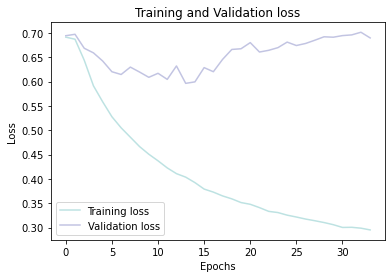

In [63]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

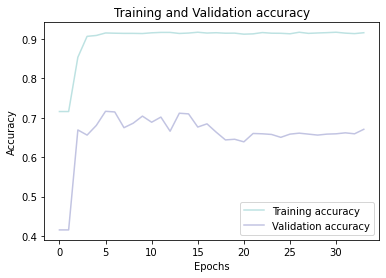

In [64]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

83/83 [==============================] - 0s 2ms/step


<AxesSubplot:>

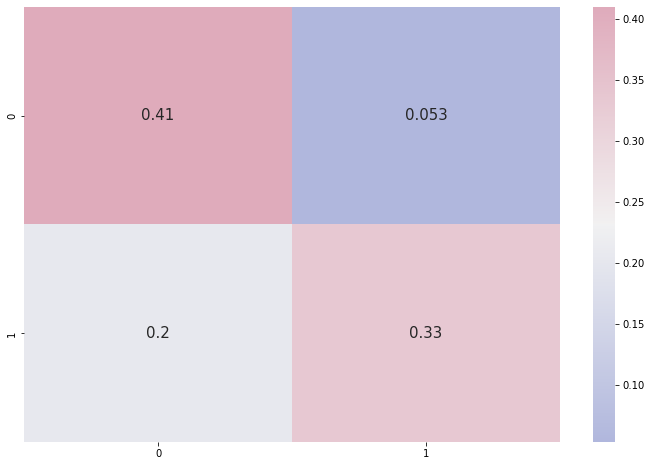

In [65]:

y_pred = model2.predict(x_test)
y_pred = (y_pred > 0.5)
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})


In [66]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1217
           1       0.86      0.62      0.72      1411

    accuracy                           0.74      2628
   macro avg       0.77      0.75      0.74      2628
weighted avg       0.77      0.74      0.74      2628

0.7431506849315068


#### selu activation model

In [67]:
model2 = Sequential()

model2.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'selu', input_dim = 12))
model2.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'selu'))
model2.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'selu'))
model2.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu'))
model2.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu'))
model2.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'selu'))
model2.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'selu'))
model2.add(Dropout(0.25))
model2.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model2.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model2.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'selu'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'selu'))
model2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model2.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model2.fit(x_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/150
154/154 [==============================] - 2s 7ms/step - loss: 0.6913 - accuracy: 0.7156 - val_loss: 0.6948 - val_accuracy: 0.4156
Epoch 2/150
154/154 [==============================] - 1s 5ms/step - loss: 0.6446 - accuracy: 0.8275 - val_loss: 0.6515 - val_accuracy: 0.6528
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.3982 - accuracy: 0.9117 - val_loss: 0.8047 - val_accuracy: 0.6610
Epoch 4/150
154/154 [==============================] - 1s 5ms/step - loss: 0.2876 - accuracy: 0.9140 - val_loss: 0.9531 - val_accuracy: 0.6504
Epoch 5/150
154/154 [==============================] - 1s 4ms/step - loss: 0.2896 - accuracy: 0.9168 - val_loss: 0.9857 - val_accuracy: 0.6528
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.2883 - accuracy: 0.9150 - val_loss: 0.9838 - val_accuracy: 0.6593
Epoch 7/150
154/154 [==============================] - 1s 4ms/step - loss: 0.2771 - accuracy: 0.9148 - val_loss: 1.0581 - val_accuracy: 0.6626

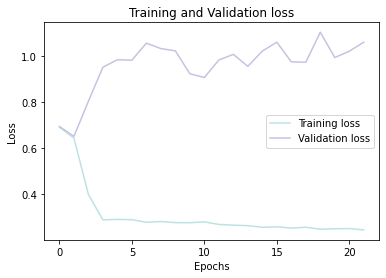

In [68]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

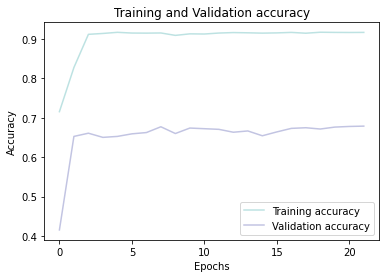

In [69]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

83/83 [==============================] - 0s 3ms/step


<AxesSubplot:>

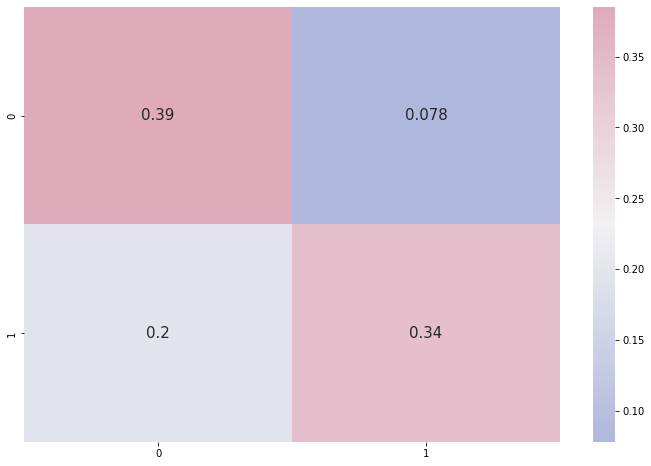

In [70]:
y_pred = model2.predict(x_test)
y_pred = (y_pred > 0.5)
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [71]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74      1217
           1       0.81      0.63      0.71      1411

    accuracy                           0.72      2628
   macro avg       0.74      0.73      0.72      2628
weighted avg       0.74      0.72      0.72      2628

0.724124809741248
